# IBM HR Analytics Çalışan Yıpranması ve Performansı

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly. as px
init_notebook_mode(connected=True)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score


In [94]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [30]:
df.tail()

,Age,Gender,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,Male,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Male,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Male,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Male,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,Male,0,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [ ]:
### Başlangıçta (1470 satır, 35 sütun) var

In [6]:
df.shape

(1470, 35)

In [7]:
###Bu veri kümesinde eksik değer yok.

In [62]:
df.isnull().sum()

Age                        0
Gender                     0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Gender                   1470 non-null   object
 2   Attrition                1470 non-null   int64 
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   JobSatisfaction          1470 non-null   int64 
 9   MaritalStatus            1470 non-null   object
 10  MonthlyIncome            1470 non-null   int64 
 11  NumCompaniesWorked       1470 non-null   int64 
 12  WorkLifeBalance          1470 non-null   int64 
 13  YearsAtCompany           1470 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 16

In [11]:
df = df[['Age', 'Gender', 'Attrition', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
         'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','WorkLifeBalance', 'YearsAtCompany']]

In [64]:
for column in df.columns:
    if df[column].dtype == object:
        print(f"{column} : {df[column].unique()} \n{df[column].value_counts()} \n ---------------------------- ")

Gender : ['Female' 'Male'] 
Male      882
Female    588
Name: Gender, dtype: int64 
 ---------------------------- 
Department : ['Sales' 'Research & Development' 'Human Resources'] 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 
 ---------------------------- 
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 
 ---------------------------- 
MaritalStatus : ['Single' 'Married' 'Divorced'] 
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 
 ---------------------------- 


In [13]:
for column in df.columns:
    if df[column].dtype != object:
        print(f"{column} : {df[column].min()}: {df[column].max()}")

Age : 18: 60
DistanceFromHome : 1: 29
Education : 1: 5
EnvironmentSatisfaction : 1: 4
JobSatisfaction : 1: 4
MonthlyIncome : 1009: 19999
NumCompaniesWorked : 0: 9
WorkLifeBalance : 1: 4
YearsAtCompany : 0: 40


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


# Fndi the age distribution of employees in IBM ?

In [ ]:
###IBM'de çalışanların yaş dağılımı
### histogram for age

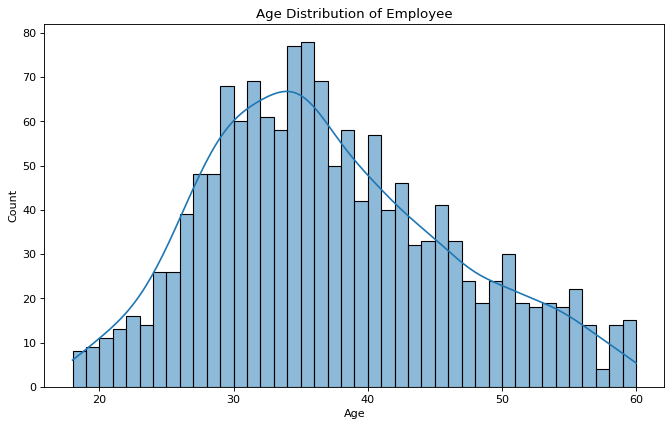

In [19]:
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='Age', bins=42, kde=True).set_title('Age Distribution of Employee');

In [69]:
df[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [ ]:
####Çoğu çalışan 30'lu yaşlarındadır ve en yüksek sayıya sahip 35 yaşındakiler ve en düşükleri 60 yaş civarında veya 20'nin altındaki kişilerdir.

In [71]:
df[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

# Explore attrition by age?

In [ ]:
###Yaşa göre yıpranmalara bakalım

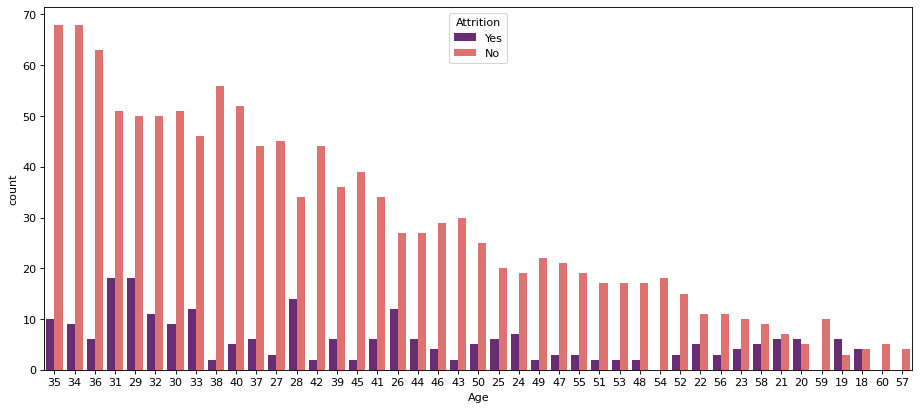

In [50]:
plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=df, x='Age', hue='Attrition', order = df['Age'].value_counts().index, palette='magma').set_title
('Attrition by Age');

In [ ]:
###Yaş Grubuna Göre Yıpranma

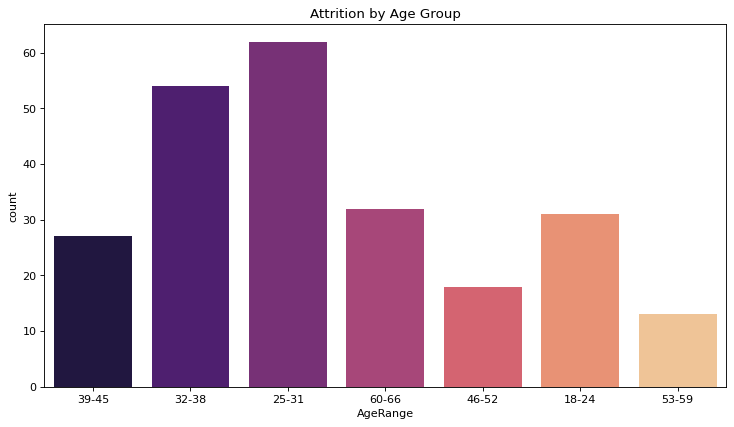

In [67]:
plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='AgeRange', palette='magma').set_title('Attrition by Age Group');

# Explore attrition by Gender

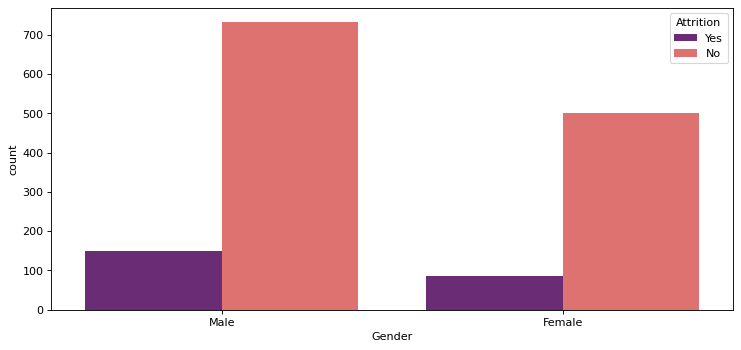

In [52]:
plt.figure(figsize=(11,5), dpi=80)
sns.countplot(data=df, x='Gender', hue='Attrition', order = df['Gender'].value_counts().index, palette='magma').set_title
('Attrition by Gender');

In [ ]:
###Şirketteki erkek ve kadın sayısı arasındaki oran 1.5'tir.
Kadınların yaklaşık %6'sı, erkeklerin %10'u şirketten ayrıldı.
Firmadan ayrılma ihtimali olan erkek sayısı, kadın sayısından daha fazla.

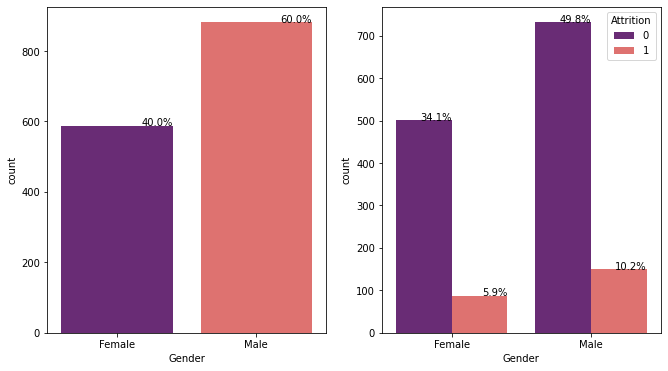

In [50]:
plt.figure(figsize=(11,6))
total = float(len(df))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",palette='magma',data=df)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition",palette='magma', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [ ]:
###Çalışanların yıpranma oranları

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


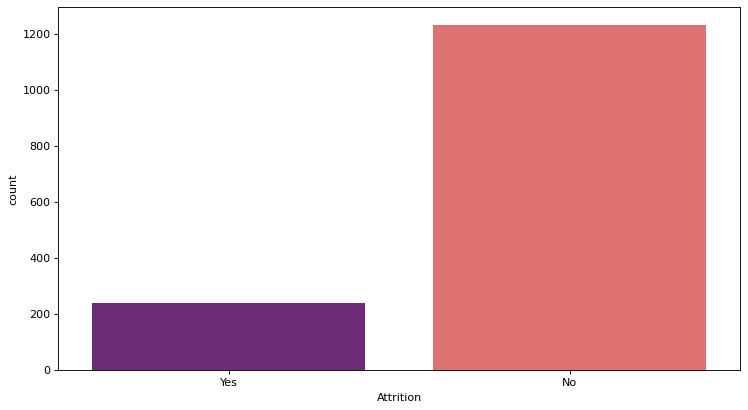

In [54]:
print(df.groupby('Attrition')['Attrition'].count())

plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=df, x='Attrition', palette='magma');

In [ ]:
###çalışanların medeni durumlarına göre yıpranma

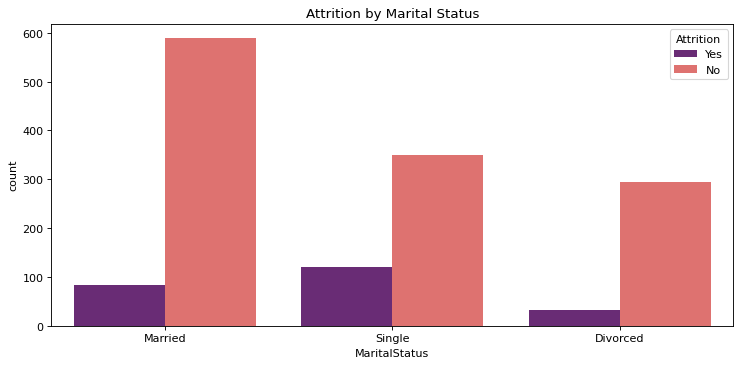

In [47]:
plt.figure(figsize=(11,5),dpi=80)
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', order=df['MaritalStatus'].value_counts().index, palette='magma').set_title('Attrition by Marital Status');

# Find out the distribution of employees by the education field

In [ ]:
#### çalışanların Eğitimden kaynaklanan yıpranma (1 - Kolej altı, 2 - Kolej, 3 - Lisans, 4 - Yüksek Lisans, 5 - Doktor)

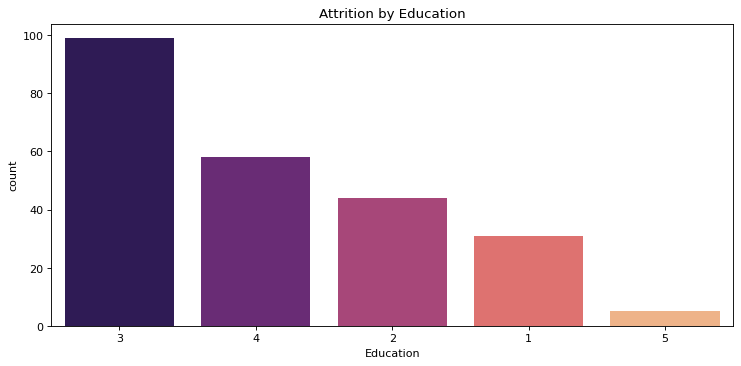

In [56]:
plt.figure(figsize=(11,5),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Education', order=df['Education'].value_counts().index, 
              palette='magma').set_title('Attrition by Education');

In [ ]:
### çalışanların eğitim durumuna göre yıpranma oranı
###histplot

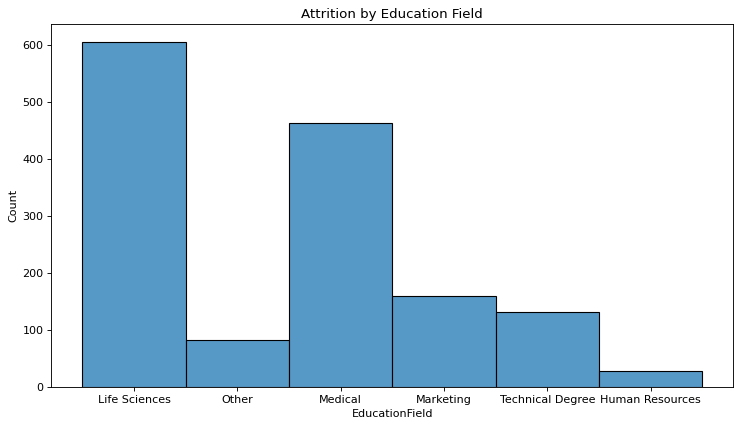

In [68]:
plt.figure(figsize=(11,6), dpi=80)
sns.histplot(data=df, x='EducationField').set_title('Attrition by Education Field');

In [ ]:
### çalışanların Eğitim alanında uzmanlaşan çalışanlar, en yüksek yıpranma yüzdesine sahip olan Yaşam Bilimleri'ni, 
#ardından Medikal ve Pazarlama izliyor.

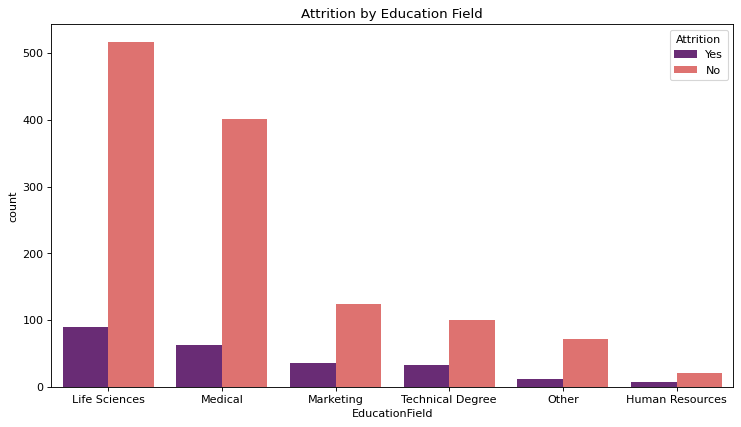

In [58]:
plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=df, x='EducationField', hue='Attrition', order = df['EducationField'].value_counts().index, palette='magma').set_title('Attrition by Education Field');

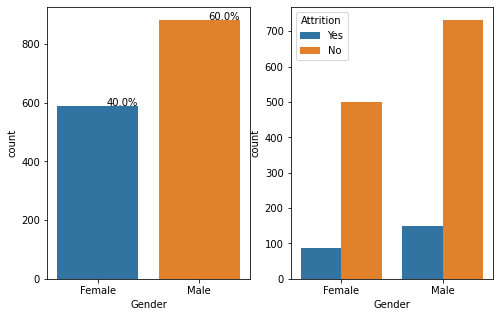

In [112]:
plt.figure(figsize=(8,5))
total = float(len(df))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=df)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_height()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [ ]:
####Satış Departmanı'ndaki Yıpratma oranı %20 (92/446),
#diğer departmanlar arasında en yüksek olup,
#Ar-Ge Departmanı %13'ten (133/961) %7 daha fazladır.
3Şirkette üç Departman: Ar-Ge, Satış, İK

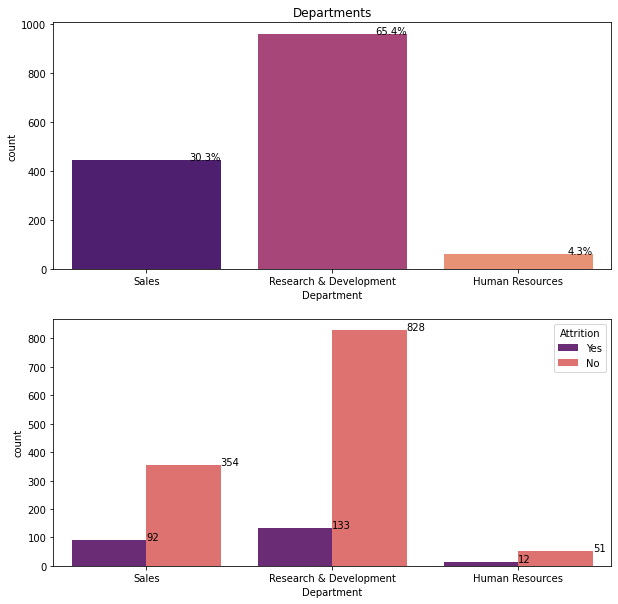

In [113]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
q=sns.countplot(x= 'Department' ,data = df ,palette='magma',)
plt.title('Departments')
for p in q.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    q.annotate(percentage, (x, y),ha='right')
plt.subplot(2,1,2)
u=sns.countplot(x= 'Department' ,data = df ,palette='magma'  ,hue =df['Attrition'])
for p in u.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #u.annotate(percentage, (x, y),ha='left')
    u.annotate(y,(x,y),ha='left')
plt.show()

In [ ]:
###çalışanların Departmana göre yıpranma
##İK,ile Satış departmanında yıpranma yüksektir. 
#Araştırma ve Geliştirme departmanı, diğer 2 departmana göre daha az yıpranma görünmektedir.

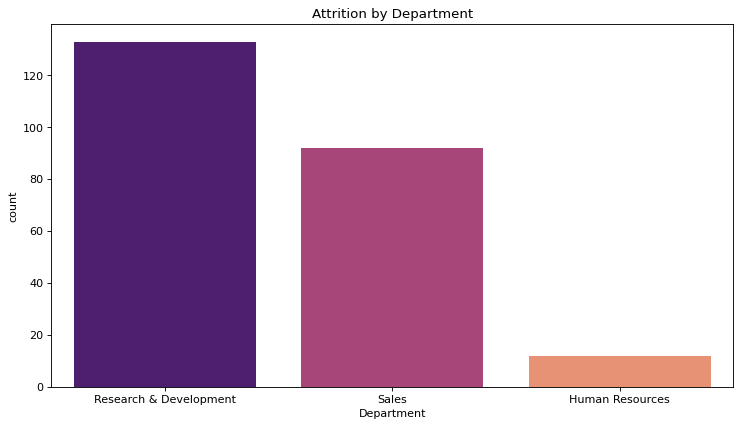

In [65]:
plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Department', palette='magma', order = df['Department']
              .value_counts().index).set_title('Attrition by Department');

In [ ]:
### Az seyahat eden çalışanlar en yüksek yıpranma düzeyine sahipken, seyahat etmeyen çalışanlar en az yıpranma şansına sahipti.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


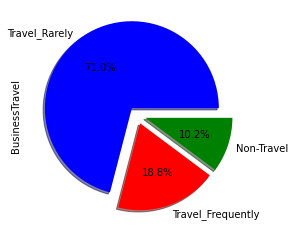

In [137]:
df['BusinessTravel'].value_counts().plot(kind='pie',explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['b','r','g'])
print(df['BusinessTravel'].value_counts())

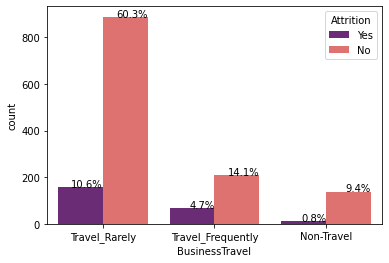

In [134]:
b=sns.countplot(x= 'BusinessTravel' ,data = df ,palette='magma'  ,hue =df['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    b.annotate(percentage, (x, y),ha='right')
    
plt.show()

In [33]:
df.head(10)

,Age,Gender,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,AgeRange
0,41,Female,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,39-45
1,49,Male,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,46-52
2,37,Male,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,32-38
3,33,Female,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,32-38
4,27,Male,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,25-31
5,32,Male,No,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7,32-38
6,59,Female,No,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1,60-66
7,30,Male,No,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1,25-31
8,38,Male,No,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9,60-66
9,36,Male,No,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7,32-38


In [ ]:
###çalışanların çoğunun evden uzaklığı (1-10 km)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

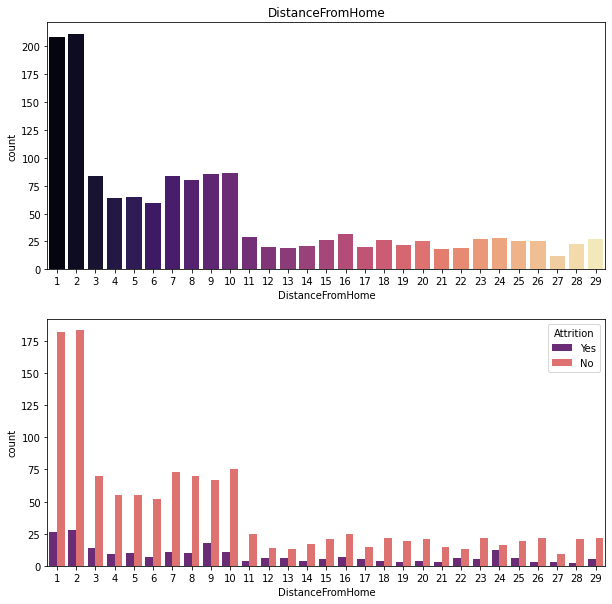

In [117]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
sns.countplot(x= 'DistanceFromHome' ,data =df ,palette='magma')
plt.title('DistanceFromHome')
plt.subplot(2,1,2)
sns.countplot(x= 'DistanceFromHome' ,data = df ,palette='magma'  ,hue =df['Attrition'])

In [ ]:
###Çalışanın evden uzaklığı, daha yüksek yıpratma demektir .
#Yıpranmış çalışanların ortancasının, medeni durumlarının yanında kalanlardan 
#daha uzun süre işe gidip gelmek zorunda kaldığını görebiliriz.

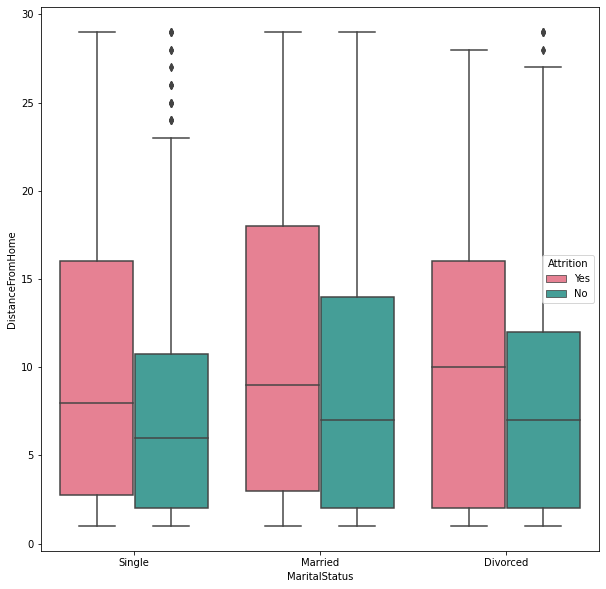

In [139]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['MaritalStatus'],y=df['DistanceFromHome'],hue=df['Attrition'],palette='husl')
plt.show()

In [ ]:
### çalışanların Evden uzaklık mesafesi 10 km'den fazla olduğunda; çalışanın işten ayrılma olasılığı yüksektir.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


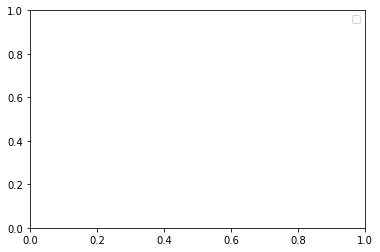

In [126]:
df_left=df[df[ 'Attrition']==1]['DistanceFromHome'] 
df_stay=df[df[ 'Attrition']==0]['DistanceFromHome'] 

sns.kdeplot(df_left, label = 'Employee left', shade = True, color = 'r' )
sns.kdeplot(df_stay, label = 'Employee stay', shade = True, color = 'b')
plt.legend()
plt.show()

In [ ]:
###çalışma koşulları memnuniyeti (1 - Düşük, 2 - Orta, 3 - Yüksek, 4 - Çok Yüksek)

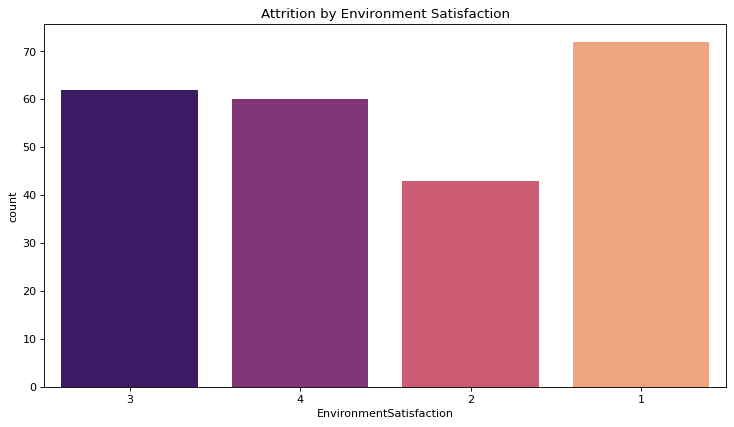

In [79]:
plt.figure(figsize=(11,6),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='EnvironmentSatisfaction', order=df['EnvironmentSatisfaction']
              .value_counts().index, palette='magma').set_title('Attrition by Environment Satisfaction');

In [ ]:
#### İş memnuniyeti:(1 - Düşük, 2 - Orta, 3 - Yüksek, 4 - Çok Yüksek)

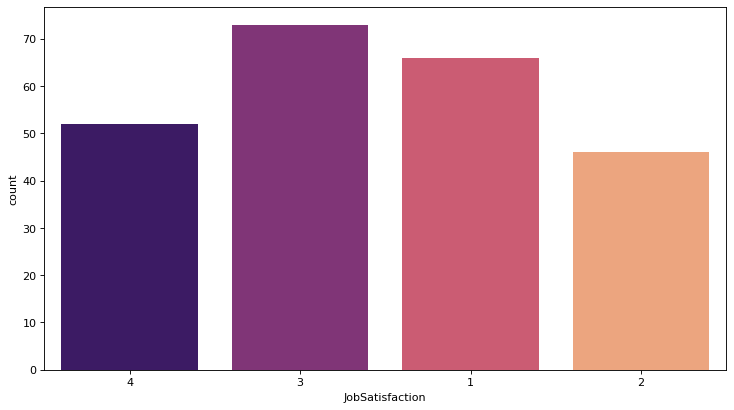

In [44]:
plt.figure(figsize=(11,6),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='JobSatisfaction', order=df['JobSatisfaction'].value_counts().index, palette='magma');

In [ ]:
####Çalışanların çoğu işlerine bağlılıklarını Yüksek olarak değerlendirmiştir.

#İşlerine katılımlarını orta olarak değerlendiren çalışanların Yıpratma oranı (%19), 
#Yüksek katılımdan (%14) %5 daha fazladır.

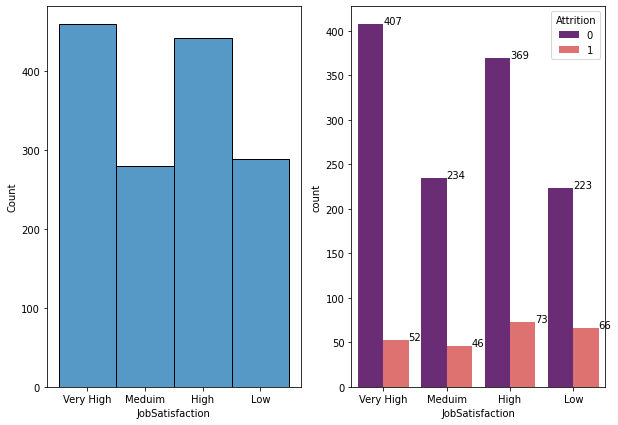

In [89]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
df['JobSatisfaction'] = df['JobSatisfaction'].replace([1,2,3,4],['Low','Meduim', 'High', 'Very High'])
a=sns.histplot(x= 'JobSatisfaction' ,data = df ,palette='magma'  )

plt.subplot(1,2,2)
b=sns.countplot(x= 'JobSatisfaction' ,data = df ,palette='magma'  ,hue =df['Attrition'])
for p in b.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    
    b.annotate(y,(x,y),ha='left')
plt.show()

In [ ]:
### performans/ bölüm /departman değerlendirmesi

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


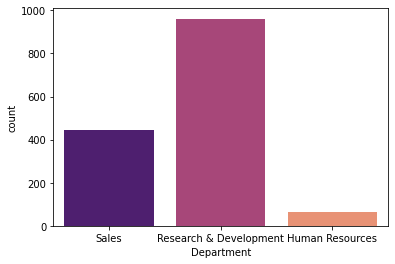

In [108]:
print(df['Department'].value_counts())
sns.countplot(x= 'Department' ,data = df ,palette='magma'  )
plt.show()

In [ ]:
###Çalışanların , ortalama 5 yıl olmak üzere 3-9 yıl şirkette kalır.

C:\Users\Senem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='YearsAtCompany'>

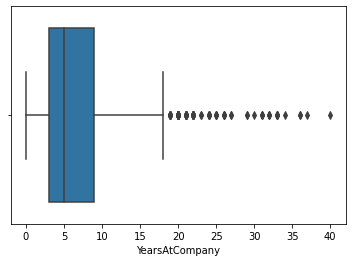

In [76]:
sns.boxplot(df["YearsAtCompany"])

In [ ]:
##eğitim ile aylık gelir arasındaki ilişki

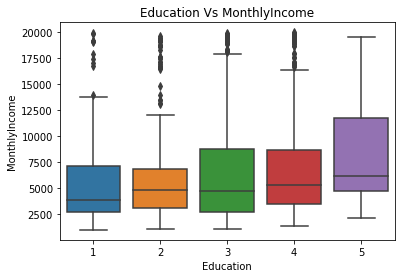

In [104]:
plt.title('Education Vs MonthlyIncome')
sns.boxplot(x=df['Education'],y=df['MonthlyIncome'])
plt.show()

In [ ]:
####Aylık Gelir ve Cinsiyet arasındaki ilişki

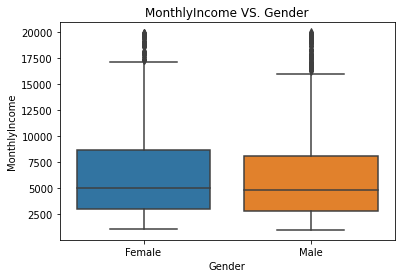

In [105]:
plt.title('MonthlyIncome VS. Gender')
sns.boxplot(x=df['Gender'],y=df['MonthlyIncome'])
plt.show()

In [ ]:
###Aylık Gelir ve İş Rolü arasındaki ilişki

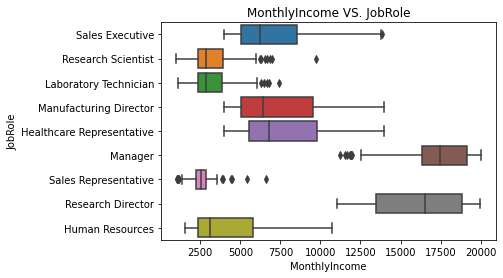

In [106]:
plt.title('MonthlyIncome VS. JobRole')
sns.boxplot(y=df['JobRole'],x=df['MonthlyIncome'])
plt.show()

In [ ]:
###Departman başına yıpranma yüzdesini göz önüne alırsak, İK departmanının en fazla yıpranmaya sahip olduğunu görürüz.

In [78]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
###aylık gelirler
###Aylık Gelir analizimizden de görüldüğü gibi, 
düşük gelir grubunda yıpranma oranı yüksektir ve bu da düşük gelirin bir kuruluştan ayrılmak için potansiyel bir motivasyon kaynağıdır.
Bu yıpranma oranı, genel gelir dağılımının orta aralığı olan 10k Aylık Gelirdeki artışla daha da azalmaktadır. 

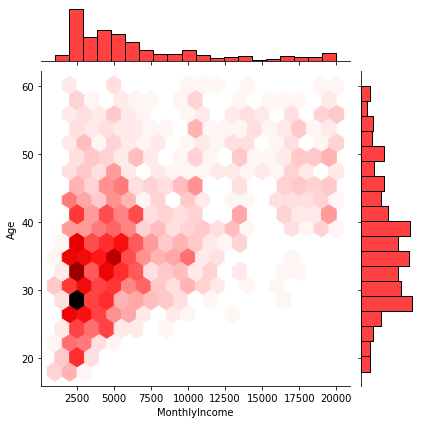

In [84]:
sns.jointplot(x='MonthlyIncome',y='Age',kind= 'hex', color= 'red', data=df,)
plt.show()

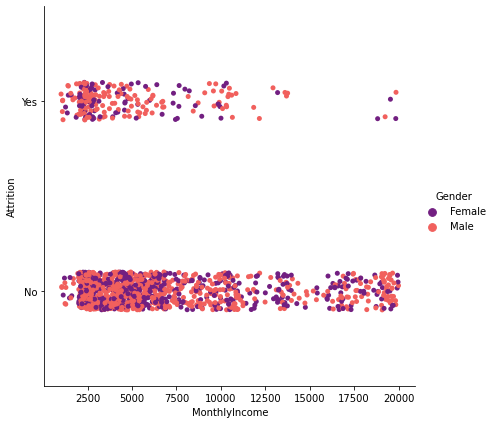

In [85]:
sns.catplot(x='MonthlyIncome',y='Attrition',hue='Gender',data=df,height=6,palette='magma')
plt.show()

In [86]:
attr_income = df.groupby(['MonthlyIncome', 'Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Count')
attr_income.head()

,MonthlyIncome,Attrition,Count
0,1009,Yes,1
1,1051,No,1
2,1052,No,1
3,1081,Yes,1
4,1091,Yes,1


In [87]:
attr_income['MonthlyIncome']=round(attr_income['MonthlyIncome'],-3)
attr_income.head()

,MonthlyIncome,Attrition,Count
0,1000,Yes,1
1,1000,No,1
2,1000,No,1
3,1000,Yes,1
4,1000,Yes,1


In [88]:
attr_income = attr_income.groupby(['MonthlyIncome', 'Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Count')
attr_income.head()

,MonthlyIncome,Attrition,Count
0,1000,No,9
1,1000,Yes,10
2,2000,No,122
3,2000,Yes,64
4,3000,No,178


In [ ]:
####çalışanların sadece %16'sı şirketten ayrıldı, yani toplam 1470 çalışanın 237'si.

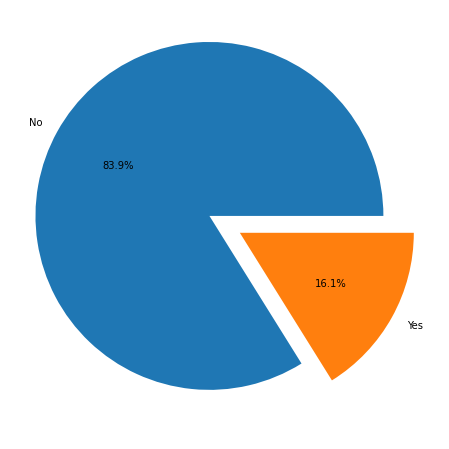

In [30]:
plt.figure(figsize=(8,8))
pie =df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [ ]:
###Statüsü bekar olarak etiketlenen çalışanın şirketten ayrılmak için açık bir göstergesi varken,
#evli olan diğerleri istikrarlı olma eğilimindedir.

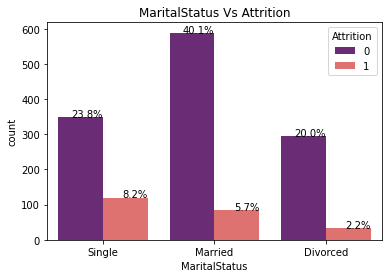

In [53]:
a=sns.countplot(x= 'MaritalStatus' ,data =df ,palette='magma',hue='Attrition')
plt.title('MaritalStatus Vs Attrition')
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='right')

plt.show()

In [78]:
plt.figure(figsize = (10 , 13))
plt.subplot(2 ,1,1)
sns.countplot(y= 'JobRole' ,data =df ,palette='magma')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole' ,data = df ,palette='magma'  ,hue =df['Attrition'])
AxesSubplot:xlabel='count', ylabel='JobRole'

SyntaxError: invalid syntax (2898202002.py, line 7)

In [ ]:
### 7 yıldan daha az deneyime sahip daha fazla çalışanın ayrılma eğiliminde olduğunu görebiliriz
## daha fazla çalışanın şirkette 5 yıldan az bir süre ile ayrılma eğiliminde olduğunu görebiliriz
## Mevcut görevde 2 yıldan az bir süre ile daha fazla çalışanın ayrılma eğiliminde olduğunu görebiliriz

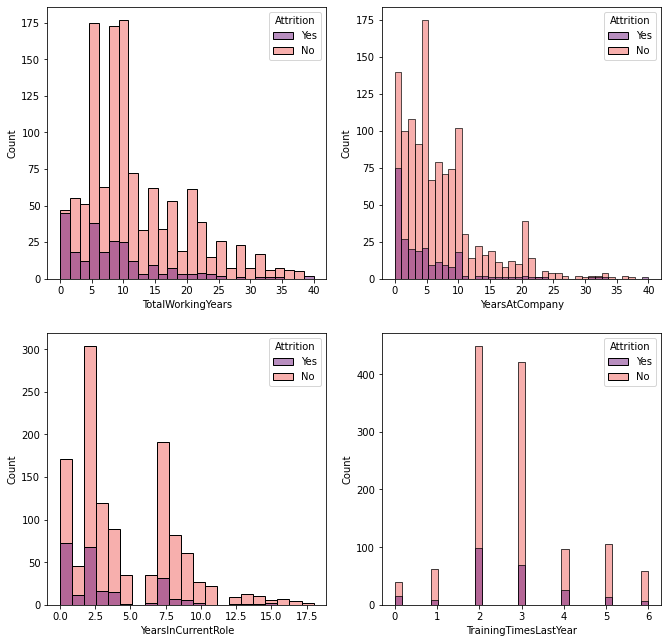

In [98]:
plt.figure(figsize=(11,11))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkingYears' ,data =df ,palette='magma',hue='Attrition')
plt.subplot(2,2,2)
sns.histplot(x= 'YearsAtCompany' ,data =df ,palette='magma',hue='Attrition')
plt.subplot(2,2,3)
sns.histplot(x= 'YearsInCurrentRole' ,data =df ,palette='magma',hue='Attrition')
plt.subplot(2,2,4)
sns.histplot(x= 'TrainingTimesLastYear' ,data =df ,palette='magma',hue='Attrition')
plt.show()

In [ ]:
##MonthlyIncome ve TotalWorkingYears arasındaki ilişki;
#şirkette 15 yıllık Tecrübeye sahip Çalışanların gelirlerinde düşüş var

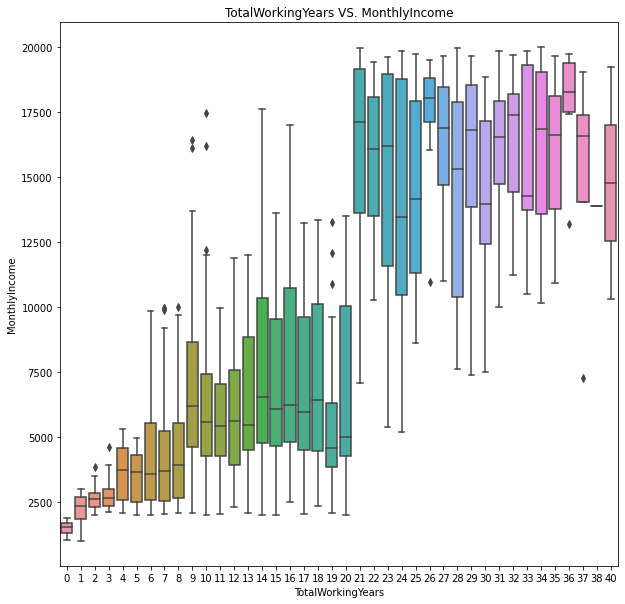

In [138]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['TotalWorkingYears'],y=df['MonthlyIncome'])
plt.title('TotalWorkingYears VS. MonthlyIncome')
plt.show()

In [ ]:
##TotalWorkingYears', 'JobLevel' ve 'MonthlyIncome' ile güçlü bir şekilde ilişkilidir. 
#Genel olarak, oldukça fazla değişkenin zayıf bir şekilde ilişkili olduğunu görebiliriz.

<AxesSubplot:>

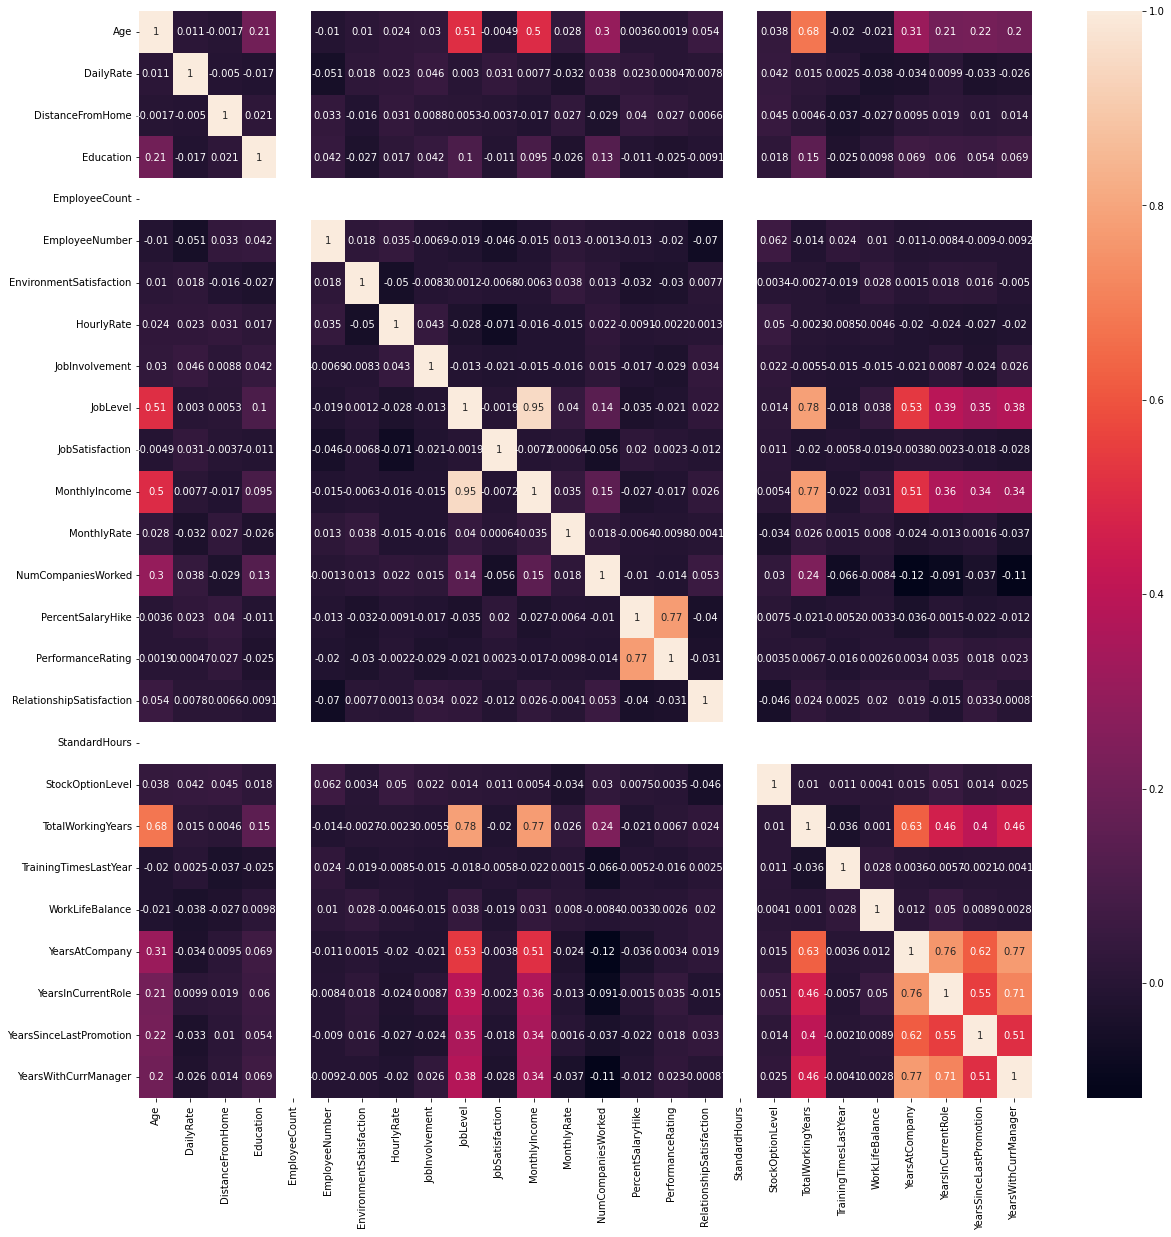

In [128]:
plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)